#### Supervised Learning: Predicting Customer Churn

* Perform classification tasks using logistic regression
* Implement the most widely used data science pipeline (OSEMN)
* Perform data exploration to understand the relationship between the target and explanatory variables.
* Select the important features for building your churn model.
* Perform logistic regression as a baseline model to predict customer churn.

Classification problems are the most common type of machine
learning problem. Classification tasks are different from
regression tasks, in the sense that, in classification tasks, we
predict a __discrete class label__, whereas in the case of
regression, we predict continuous values. Another notable
difference between classification problems and __regression
problems__ lies in the choice of __performance metrics__. With
classification problems, __accuracy__ is commonly chosen as a
__performance metric__, while __root mean square__ is quite common
in the case of __regression__.

There are many important business use cases for classification
problems where the dependent variable is not continuous,
such as churn and fraud detection. In these cases, the
response variable has only two values, that is, churn or not
churn, and fraud or not fraud. For example, suppose we are
studying whether a customer churns (y = 1) or doesn't churn
(y = 0) after signing up for a mobile service contract. Then,
the probability that a customer churns is indicated as p =
P(Churn), and the possible explanatory variable x includes account age, current billing amount, and average days
delinquent (that is, the average number of days a person
misses making his or her payment).

Workflow of a supervised classification task

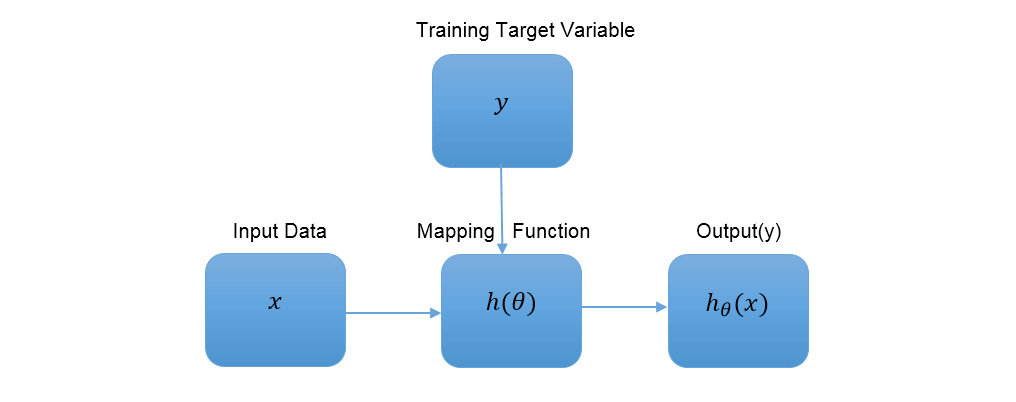

As a supervisor, we provide the model with the variables (x,y), which lets the model calculate the parameter theta (θ). This parameter is learned from the training data and is also termed as a coefficient. x includes the explanatory variables and y is the target label that we provide to the model so that the model learns the parameters. Using this, the model produces a
function h(θ), which maps input x to a prediction $h_θ(x)$.

Classification problems can generally be divided into two
types:
1. Binary classification: The target variable can have only two categorical values or classes. For example, given an image, classify whether it's a cat or not a cat.
2. Multiclass classification: The target variable can have multiple classes. For example, given an image, classify whether it's a cat, dog, rabbit, or bird.

#### Understanding Logistic Regression

Logistic regression is one of the most widely used
classification methods, and it works well when data is linearly
separable. The objective of logistic regression is to squash the
output of linear regression to classes 0 and 1.

#### Revisiting linear regression

Equation of linear regression

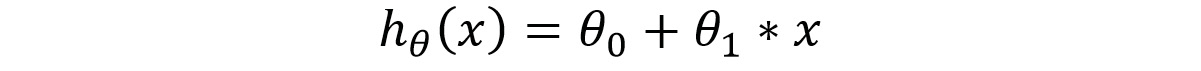

Here, x refers to the input data, y is the target variable, and $θ_0$
and $θ_1$ are parameters that are learned from the training data.

Also, the cost function in case of linear regression, which is to
be minimized is as follows:

Linear regression cost function

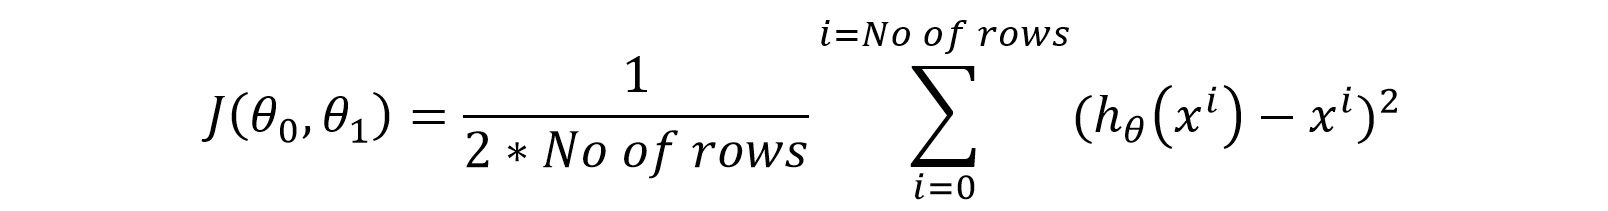

This works well for continuous data, but the problem arises
when we have a target variable that is categorical, such as, 0
or 1. When we try to use linear regression to predict the target
variable, we can get a value anywhere between −∞ to +∞,
which is not what we need.

#### Logistic Regression

If a response variable has binary values, the assumptions of
linear regression are not valid for the following reasons:
* The relationship between the independent variable and the predictor variable is not linear.
* The error terms are heteroscedastic.
* The error terms are not normally distributed.

If we proceed, considering these violations, the results would be as follows:
* The predicted probabilities could be greater than 1 or less than 0.
* The magnitude of the effects of independent variables may be underestimated.

With logistic regression, we are interested in modeling the
mean of the response variable, p, in terms of an explanatory
variable, x, as a probabilistic model in terms of __odd ratio__. A
simple logistic regression model formula is as follows:

Simple logistic regression model formula

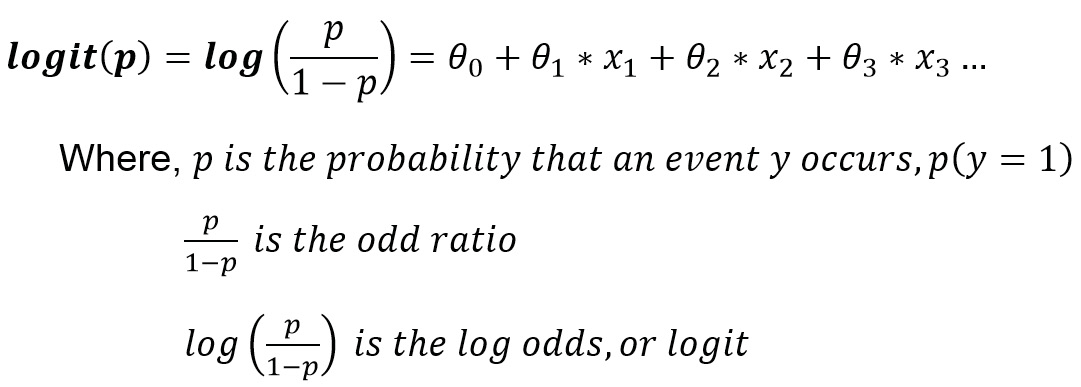

With logistic regression, we still use the linear regression
formula. However, we will be squashing the output of the
linear function to a range of 0 and 1 using a sigmoid function.
The sigmoid function is the inverse of the logit function:

Sigmoid function

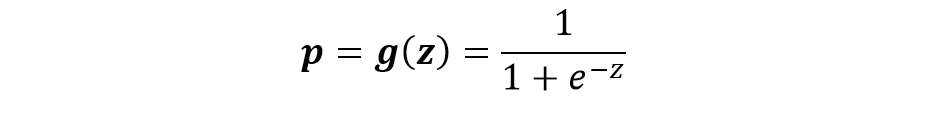

Squash the output of the linear equation as follows:

Squashing output of linear equation using sigmoid

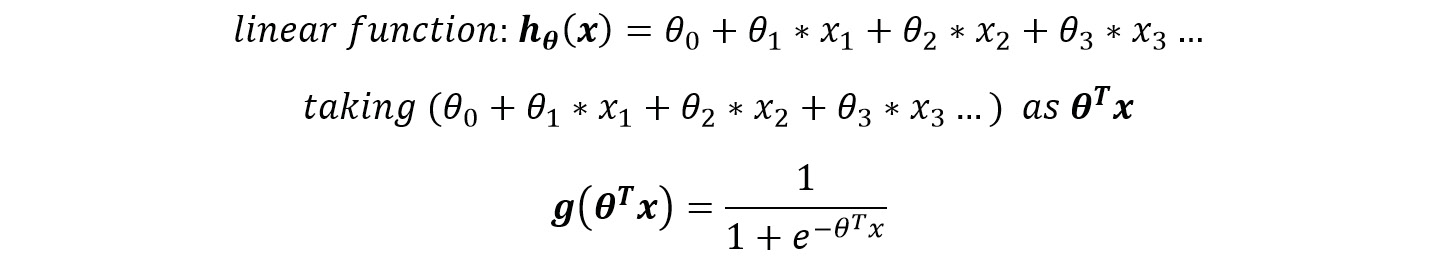

Here, we take the output of hθ(x) and give it to the g(z)
function, which returns the squashed function to the range of
0 to 1.

#### Plotting the sigmoid function

We will plot a sigmoid function using values generated from −10 to +10. This exercise will tell us how a sigmoid function behaves and what it looks like. It gives the idea that, even though logistic regression uses a linear
regression equation, which can give values between −10 to +10, a sigmoid function squashes the output to 0 and 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
z = np.arange(-10, 10, 0.1)

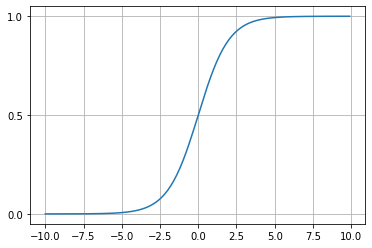

In [4]:
# Plot of sigmoid function
# sigmoid function squashes the values −10 to +10 to between 0 and 1

sig = sigmoid(z)
plt.plot(z, sig)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(True)

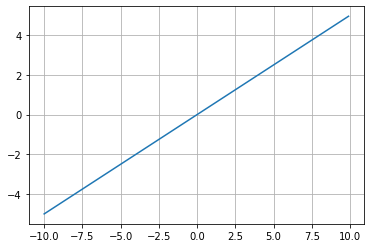

In [5]:
# Plot using a linear function 0 + 0.5*z

plt.plot(z, 0 + 0.5 * z)
plt.grid(True)

#### Cost function for logistic regression

The sigmoid function that we described previously contains a non-linear
term. We must convert it into a linear term, else we would have a nonconvex
function that would be difficult to optimize. The cost function of logistic regression can be defined as follows, which is obtained using Maximum
Likelihood Estimation:

Logistic regression cost function

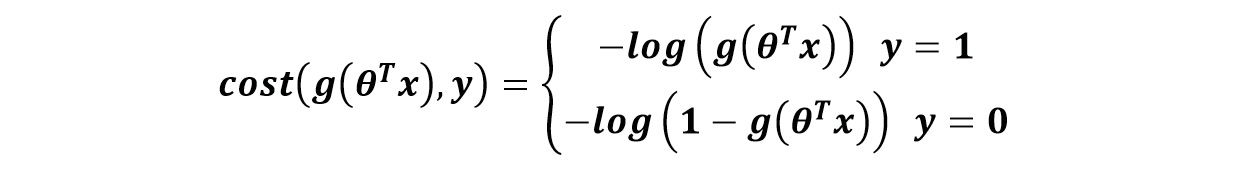

It is easy for the algorithm to optimize the cost function when we have a linear term (see the left plot in the following figure),
whereas it becomes difficult for the algorithm to optimize if
our cost function is nonlinear(see the right plot of the
following figure).

Difference between plots with linear and non-linear terms

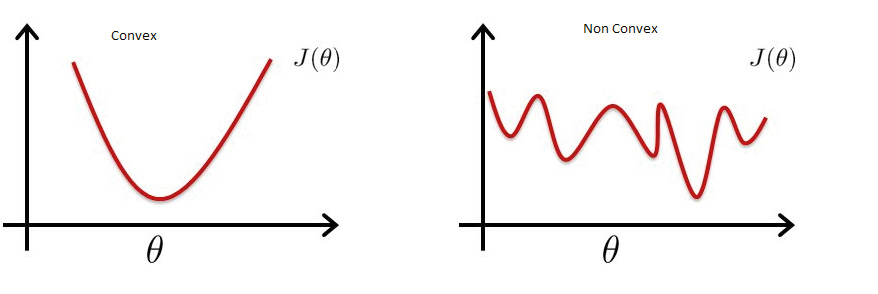

After converting our cost function for logistic regression to a
linear term, we finally get the following equation:

Optimized logistic regression cost function

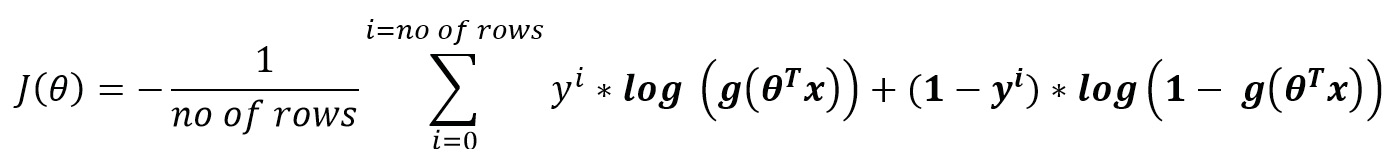

Here, θ is the parameter the model learns from the training
data.

#### Assumptions of Logistic Regression

* Logistic regression does not assume a linear relationship between dependent and independent variables.
* The dependent variable must be binary (that is, have two categories).
* The independent variable need not have intervals, be normally distributed, linearly related, or have equal variance within each group.
* The categories must be mutually exclusive and exhaustive.

#### Loading, Splitting and Applying Linear and Logistic Regression to Data

The dataset comprises scores obtained by students in two subjects.
It has also a column that has 0 and 1 values. 1 indicates that
the student has passed the exam, whereas 0 indicates that
student has not passed the exam. Your teacher has asked you
to develop a machine learning model that can predict whether
a student will pass (1) or fail (0). Apply linear and logistic
regression to predict the output. You will also see why it's not
a good idea to use linear regression for this kind of
classification problem:

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'data_science/exam_score.csv', header=None)
data.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
X_train,X_test,y_train,y_test=train_test_split(data[[0, 1]], data[[2]].astype(int),
                                               test_size=0.3, random_state=1, stratify=data[[2]].astype(int))

In [9]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Output of the prediction on test data

linear.predict(X_test)

array([[ 1.22083091],
       [ 1.17230948],
       [ 0.94507443],
       [ 0.35609403],
       [ 1.02375539],
       [ 0.8016655 ],
       [ 1.09434499],
       [ 1.05191921],
       [ 0.27273707],
       [ 0.40180325],
       [ 0.84618988],
       [ 1.06105956],
       [ 1.06873208],
       [ 0.35054279],
       [ 1.19900775],
       [ 0.51962942],
       [ 0.16641549],
       [ 1.01137892],
       [ 0.30865603],
       [ 0.30361639],
       [ 0.67983531],
       [-0.20582051],
       [ 0.34259952],
       [ 0.45063479],
       [ 0.74903637],
       [ 0.29760594],
       [ 0.43242695],
       [ 0.97129797],
       [ 0.50748505],
       [ 0.98267487]])

In [11]:
# Output of actual target values

y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

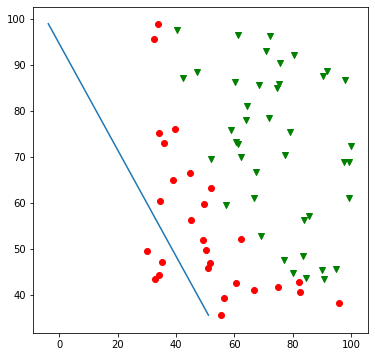

In [12]:
# Linear regression plot

color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]

marker=['o','v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))

for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)

plt.plot((- linear.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - linear.intercept_[0]) / 
         linear.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))

plt.show()

From the plot you can observe that linear regression was
unable to predict the values as 1 and 0. Therefore, the
model is not able to distinguish the classes correctly.

In [13]:
logit = linear_model.LogisticRegression()

In [14]:
logit.fit(X_train, y_train[2].values.astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Prediction of output of test data using logistic regression

logit.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1])

In [16]:
# Original value of test data

y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

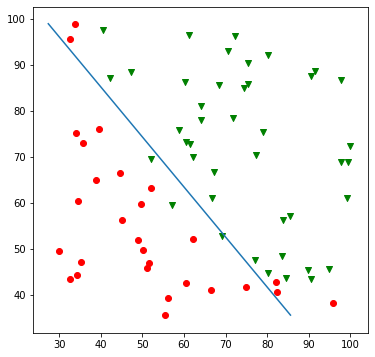

In [17]:
# Logistic regression plot

color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]

marker=['o','v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))

for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)

plt.plot((- logit.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - logit.intercept_[0]) / 
         logit.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))

plt.show()

From the plot you will observe that logistic regression was able to predict the values as 1 and 0. The graph shows that the model was able to classify most of the data points correctly, but some were misclassified. logit.predict_proba() can be used to predict probabilities instead of classes.

### Creating a Data Science Pipeline - OSEMN

1. __Obtaining__ the data, which can be from any source, structured, unstructured, or semistructured.
2. __Scrubbing__ the data, which is getting your hands dirty and cleaning the data, which can involve renaming columns and imputing missing values. Scrubbing the data typically involves missing value imputation, data type conversion, standardization, and renaming columns.
3. __Exploring__ the data to find out the relationships between each of the variables. Searching for any correlation among the variables. Finding the relationship between the explanatory variables and the response variable.
4. __Modeling__ the data, which can include prediction, forecasting, and clustering.
5. __Interpreting__ the data, which is combining all the analyses and results to draw a conclusion.

You work at a multinational bank that is aiming to increase it's market share in Europe. Recently, it has been noticed that
the number of customers using the banking services has
declined, and the bank is worried that existing customers have
stopped using them as their main bank. As a data scientist,
you are tasked with finding out the reasons behind customer
churn and to predict customer churn. The marketing team, in
particular, is interested in your findings and want to better
understand existing customer behavior and possibly predict
customer churn. Your results will help the marketing team to
use their budget wisely to target potential churners.

In [18]:
import seaborn as sns

#### Obtaining the data

In [19]:
data = pd.read_csv('data_science/Churn_Modelling.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [20]:
data.shape

(10000, 12)

#### Scrubbing data + Imputing missing values

In [21]:
data.isnull().values.any()

True

In [22]:
# Checking for missing values

data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [23]:
# Description statistics for column EstimatedSalary and Age

data[["EstimatedSalary", "Age"]].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [24]:
# Description statistics

data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


__Note__
Since Gender is a categorical variable with only two
values, we have used only Age and EstimatedSalary
for our describe function.

From the descriptive statistics we can observe that the
column HaCrCard column has a min value of 0 and a
maximum value of 1. It seems that this variable is a
categorical variable. We will learn how to change this kind
of variable to categorical, but first, let's check the count of
0s and 1s using the following syntax:

In [25]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

This shows that
approximately 70% of the customers have a credit card
and 29% of them do not have a credit card.

In [26]:
# the total number of missing values:

data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [27]:
# the percentage of missing values

round(data.isnull().sum()/len(data)*100, 2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [28]:
# Data type of columns which have missing values

data[["Gender", "Age", "EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

Now we need to impute the missing values. We can do
that by dropping the rows that have missing values, filling
in the missing values with a test statistic (such as mean,
mode, or median), or predicting the missing values using
a machine learning algorithm. For EstimatedSalary,
we will fill in the missing values with the mean of the data
in that column using the following code:

In [29]:
mean_value = data['EstimatedSalary'].mean()
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)

__Note__ For estimated salary, since the column is a continuous
column, we can use the mean of the values for the
estimated salary to replace the missing values.

In [30]:
# how many instances of each gender are present:

data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

Since there are more Males (5453) than Females (4543),
we will use the following code to replace the missing
values with the gender that occurs most frequently, that
is, Male.

In [31]:
data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().idxmax())

For Age, use mode(), to get the mode of the data, which
is 37, and then replaces the missing values with the mode
of the values in the column using the following code.

In [32]:
data['Age'].mode()
mode_value = data['Age'].mode()
data['Age'] = data['Age'].fillna(mode_value[0])

In [33]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [34]:
# Renaming columsn and changing the data type

data = data.rename(columns={
                        'CredRate': 'CreditScore',
                        'ActMem' : 'IsActiveMember',
                        'Prod Number': 'NumOfProducts',
                        'Exited':'Churn'
                        })
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [35]:
# Move the churn column to the right, drop the CustomerId column :

data.drop(labels=['CustomerId'], axis=1,inplace = True)

In [36]:
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [37]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [38]:
# Convert these variables into categorical variables

data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"].astype('category')

In [39]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

#### Exploring the Data

The data exploration step consists of the
following steps: Statistical overview, Correlation, and
Visualization.

STATISTICAL OVERVIEW

This step typically involves inspecting the data using general
descriptive statistics. In a statistical overview, we summarize
the data using the central tendency and distribution of the
data, and inspect the target variable using mean, count, and
other functions studied in previous chapters.

CORRELATION

The correlation coefficient measures the linear relationship
between two variables. It's usually represented by r and varies
from +1 to −1.

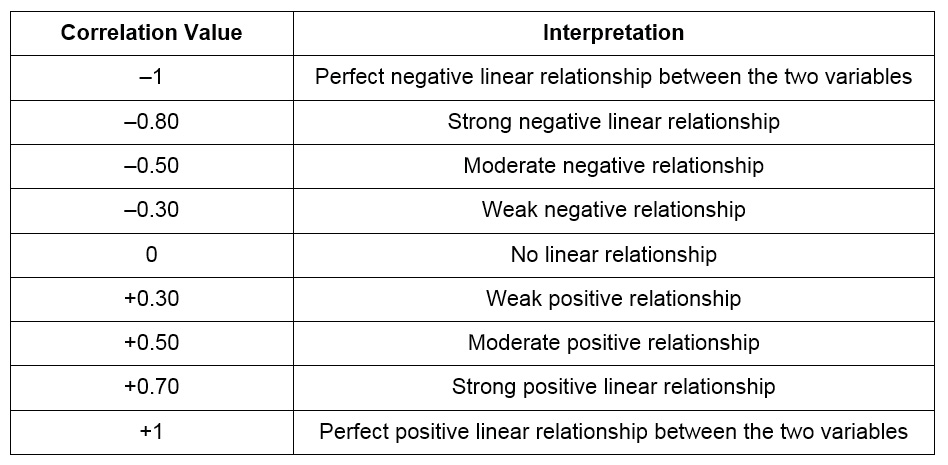

Obtaining the statistical overview and correlation plot

0 means that the customer did not churn and 1 implies that the customer churned.

In [40]:
# Inspect the target variable to see how many of the customers have churned.

data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [41]:
# The percentage of customers who left the bank

data['Churn'].value_counts(1) * 100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [42]:
# the percentage of customers that have a credit card
# 51% of the customers hold a credit card

data['IsActiveMember'].value_counts(1)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [43]:
# Statistical overview of the data
# Inspect some of the statistics, such as mean and max in the above figure.

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [44]:
# Inspect the mean attributes of customers who churned compared to those who did not churn:

summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


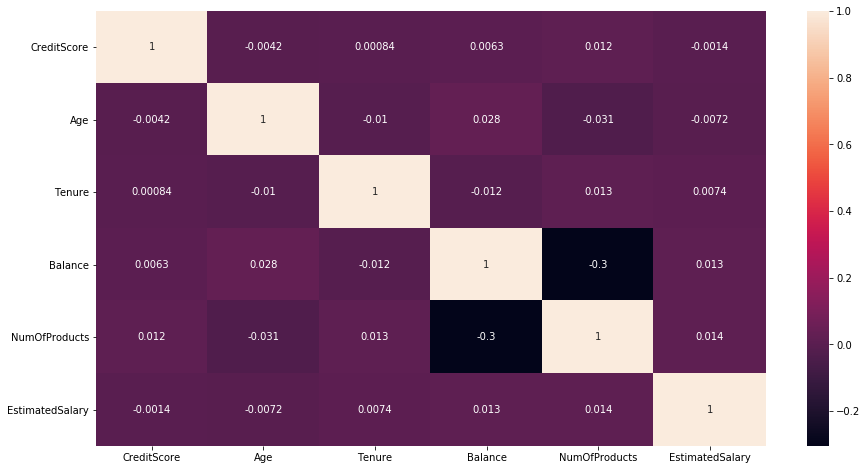

In [45]:
# Correlation plot of different features

corr = data.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            annot=True)
corr

The correlation statistics and plot provides us the
correlation between our continuous features.
From the correlation plot, it appears that there is a negative
(0.3%) relationship between the number of products purchased and the balance.

__Note__
Correlation does not imply causation. Even if the matrix
shows a relationship, do not assume that one variable caused
the other. Both may be influenced by a third variable.

#### Visualizing the Data

As pointed out by Cleveland, "Data analysis without data visualization is no data analysis." In statistics,
the use of graphical methods to reveal the distribution or/and statistics of a selected variable is popularly known as __Exploratory Data Analysis (EDA)__.

EDA was promoted by John Tukey to encourage
statisticians to explore data, and possibly formulate
hypotheses that could lead to new data collection and
experiments. The following table tells us the different kinds of
visualization that can be used for Univariate and Bivariate
Data.

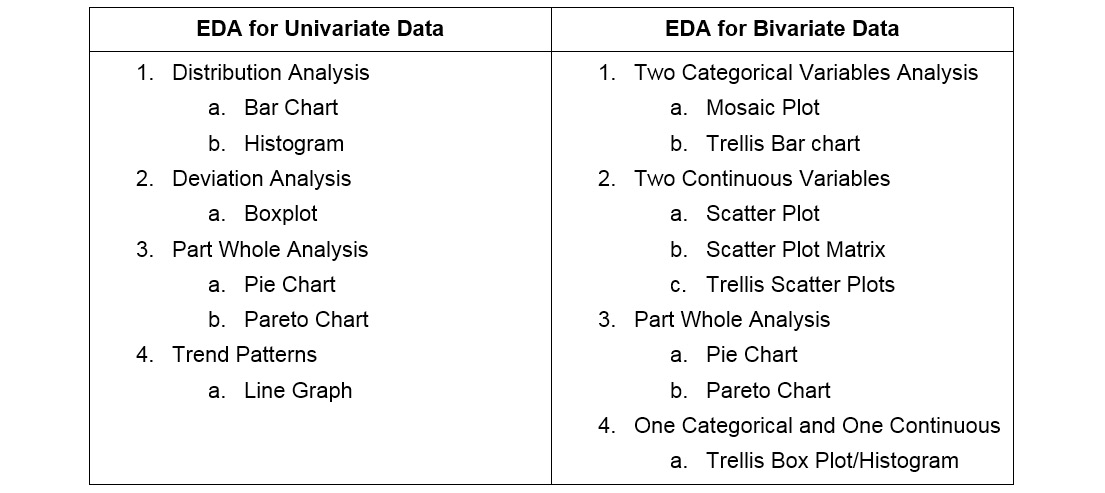

#### Performing exploratory data analysis(EDA)

In [46]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


Let's begin with univariate analysis. Plot the distribution
graph of the customers for the EstimatedSalary, Age,
and Balance variables

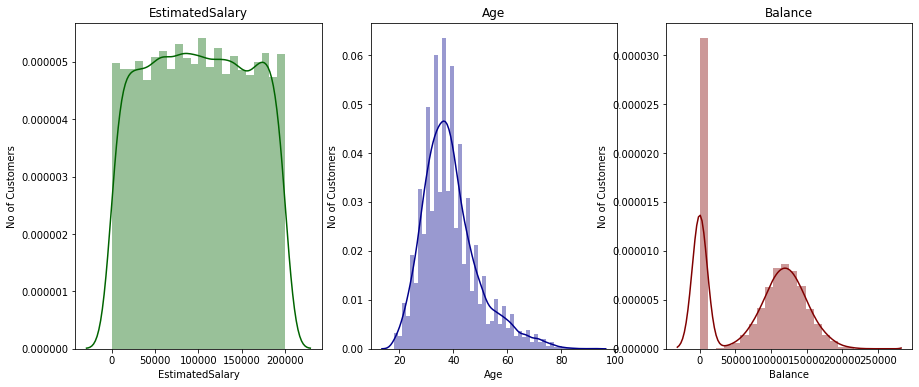

In [47]:
# Univariate analysis

f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.EstimatedSalary, kde=True, color="darkgreen", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')


sns.distplot(data.Age, kde=True, color="darkblue", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')


sns.distplot(data.Balance, kde=True, color="maroon", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers');

The following are the observations from the univariate
analysis:

EstimatedSalary: The distribution of the estimated
salary seems to be a plateau distribution.

Age: This has a normal distribution that is right skewed.
Most customers lie in the range of 30-45
years of age.

Balance: This has a bimodal distribution. A considerable
number of customers with a low balance are there, which
seems to be an outlier.

Now we'll move on to bivariate analysis. Inspect whether
there is a difference in churn for gender using bivariate analysis. Use the following code:

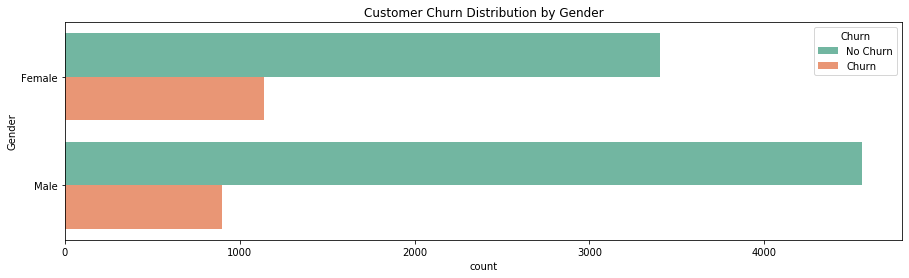

In [48]:
# Number of customer churned by gender

plt.figure(figsize=(15, 4))
p = sns.countplot(y="Gender", hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender');

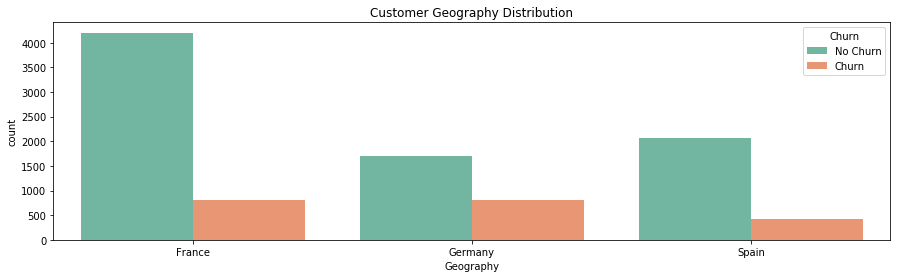

In [49]:
# Plot Geography versus Churn: 
# Number of customer churned by geography

plt.figure(figsize=(15,4))
p = sns.countplot(x='Geography', hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution');

Text(0.5, 1.0, 'Customer Distribution by Product')

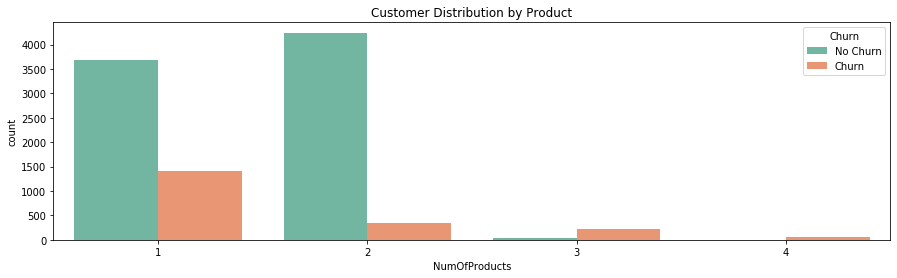

In [50]:
# Plot NumOfProducts versus Churn:

plt.figure(figsize=(15,4))
p = sns.countplot(x='NumOfProducts', hue='Churn', data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

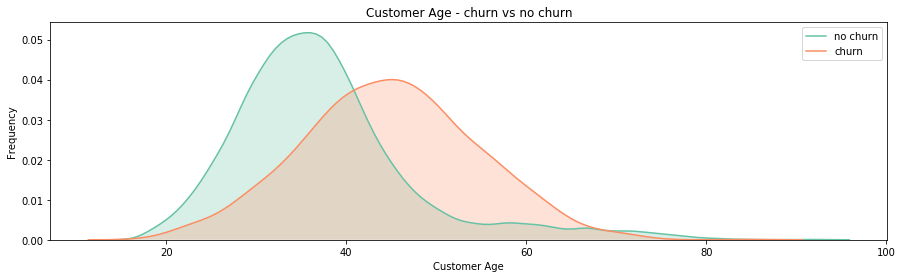

In [51]:
# Inspect Churn versus Age:

plt.figure(figsize=(15,4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Age'], 
                color=sns.color_palette("Set2")[0], 
                shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Age'],
                color=sns.color_palette("Set2")[1],
                shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')

Customers in the 35 to 45 age group seem to churn more.
As the age of the customers increases, they usually churn
more.

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

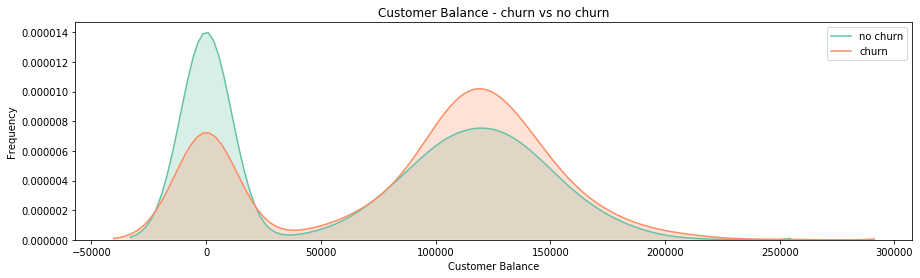

In [52]:
# Plot Balance versus Churn:

plt.figure(figsize=(15,4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Balance'],
                color=sns.color_palette("Set2")[0],
                shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Balance'],
                color=sns.color_palette("Set2")[1],
                shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')

Customers with a negative-to-low balance churn less than
customers with a balance between 75,000–150,000.

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

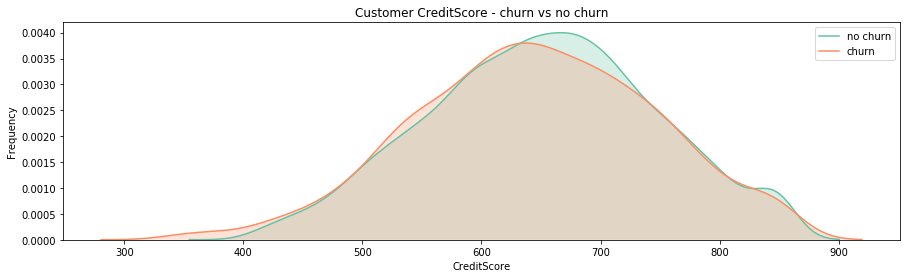

In [53]:
# Plot CreditScore versus Churn:

plt.figure(figsize=(15, 4))

ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'CreditScore'],
                color=sns.color_palette("Set2")[0],
                shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'CreditScore'],
                color=sns.color_palette("Set2")[1],
                shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')

Text(0.5, 1.0, 'Number of Products VS Balance')

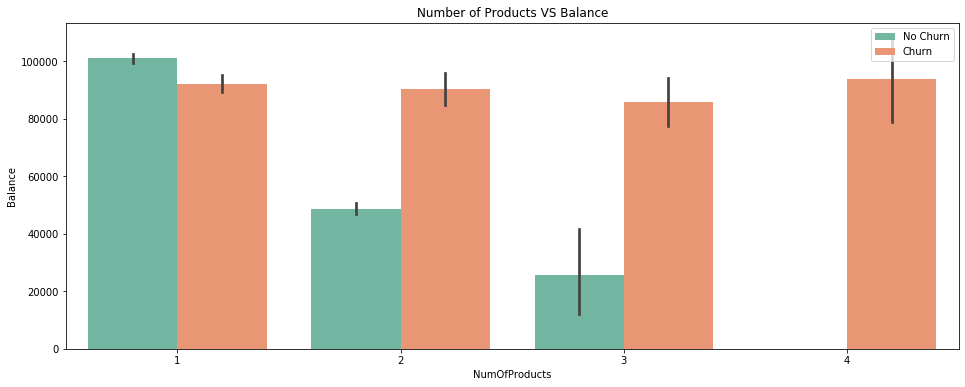

In [54]:
# Plot Balance versus NumOfProducts by Churn:

plt.figure(figsize=(16,6))

p = sns.barplot(x='NumOfProducts', y='Balance', hue='Churn', data=data, palette="Set2")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts

legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Products VS Balance')

From the above figure, it appears that as the number of
products increases, the balance for churned customers
remains very high.

#### Modeling the Data

* Feature selection

 1. Reduces training time: Fewer columns mean less data, which in turn makes the algorithm run more quickly.
 2. Reduces overfitting: Removing irrelevant columns makes your algorithm less prone to noise, thereby reducing overfitting.
 3. Improves the accuracy: It improves the accuracy of your machine learning model.

* Methods for selecting features are as follows:
    1. Univariate feature selection: This works by selecting the best feature based on the univariate statistical tests. It finds features that have the strongest relationship with the output variable.
    2. Recursive feature selection: This works by recursively removing features and building a machine learning model based on the features remaining. It then uses the model's accuracy to find the combination of features that contribute most to predicting the target.
    2. Principal component analysis: Principal component analysis is a variable reduction procedure. It uses linear algebra to transform the data into a compressed form.
    3. Treebased-feature selection: Tree-based estimators such as random forest, bagging, and boosting can be used to compute feature importance, which in turn can be used to discard irrelevant features.

#### Performing feature selection

we will be performing feature selection using a treebased selection method that performs well on classification tasks.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [56]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [57]:
# Encode of the categorical variable

data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes

In [58]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                   random_state=123, stratify=y)

In [59]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [60]:
# find the important features and store in a var

importances = forest.feature_importances_

In [61]:
# create a variable named features to store all the columns, 
# except the target variable

features = data.drop(['Churn'], axis=1).columns
indices = np.argsort(importances)[::-1]

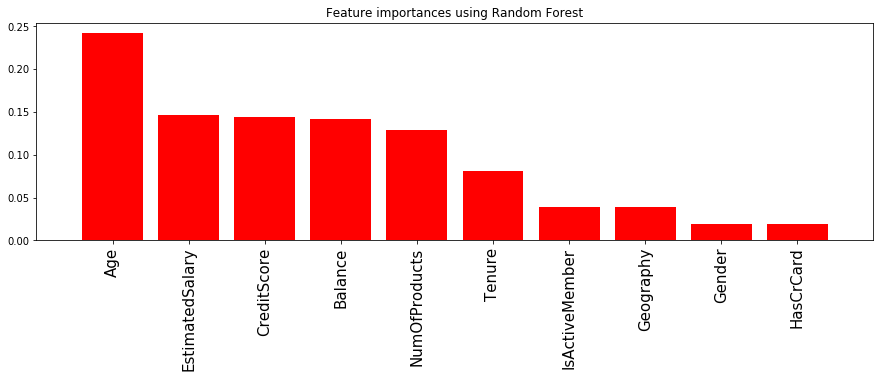

In [62]:
# Feature importance using random forest

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

From the preceding figure, you can see that the five most
important features selected from treebased
feature selection
are Age, EstimatedSalary, CreditScore, Balance, and
NumOfProducts.

#### Model Building

#### Building a logistic regression model

Through EDA, your
marketing team understood the key reasons for customer
churn. With their expectations very high, they want you to
predict customer churn so that they can focus on customers
who might churn.

In [63]:
import statsmodels.api as sm

In [64]:
top5_features = ['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [65]:
# Coefficients for each of the features

logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [66]:
coef = logistic_regression.params

def y(coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts) : 
    return coef[0]*Age + coef[1]*EstimatedSalary + coef[2]*CreditScore + coef[1]*Balance + coef[2]*NumOfProducts

Calculate the chance of a customer churning by inputting
the following values:

Age: 50, EstimatedSalary: 100,000, CreditScore:600,
Balance:100,000, NumOfProducts: 2

In [67]:
y1 = y(coef, 50, 100000, 600, 100000, 2)

In [68]:
# 38.23% likelihood of churning

p = np.exp(y1) / (1 + np.exp(y1))
p

0.3823017864835243

In [69]:
from sklearn.linear_model import LogisticRegression

We will implement
scikitlearn's
logisticRegression to build our
classifier and predict on the test data to find out the
accuracy of our model:

In [70]:
# Fit the logistic regression model on the partitioned training data

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train)

In [71]:
# Predicted probability of the test data with top 5 features

clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

In [72]:
clf.score(X_test[top5_features], y_test)

0.79

Note
The used lbfgs as an optimization algorithm that
approximates Broyden–Fletcher–Goldfarb–Shanno
algorithm and is recommended for a smaller dataset.

Interpreting the data

* The number of customers that churned is 20.37% (2,037) and that number that did not churn out is 79.63% (7,963).
* Overall, the average credit score of customer who churned is 645.35 and the average age of the customers who churned is 44.83 years.
* The average balance and the estimated salary of the customers who churned are 911,108.53 and 101,465.67 respectively, which is greater than customers who didn't churn.
* The median number of products purchased by customers who churned is 1.
* Customer age and churn are 29% positively correlated.
* Balance and churn are 12% positively correlated.
* Number of products and Balance are 30% negatively correlated.
* The difference between churn and nonchurn customers in Germany and Spain is less than in France.
* Comparatively, more female customers have churned. The amount of churn is greater for customers with 34 products.
* Customers within the 35-45 age group seem to churn more. As the age of customers increases, they usually churn more.
* The amount of churn is less with customers with a negative-to-low balance compared to customers having a balance of 75,000–150,000.
* The most important features selected from treebased feature selection are Age, EstimatedSalary, CreditScore, Balance, and NumOfProducts.

#### Standardizing data

We will use the bank churn prediction data. we
performed feature selection using random forest. The features
selected for our bank churn prediction data are: Age,
EstimatedSalary, CreditScore, Balance, and
NumOfProducts.

Our objective will be to standardize data after
we have carried out feature selection. On exploring the
previous chapter, it was clear that data is not standardized;
therefore in this exercise, we will implement standard scalar
to standardize the data to zero mean and unit variance.

In [73]:
from sklearn import preprocessing

In [74]:
X_train[top5_features].head()

,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
490,29.0,196356.17,591,97541.24,1
5555,39.0,164018.98,614,0.00,2
9235,27.0,80587.27,462,176913.52,1
6594,40.0,57817.84,747,0.00,1
6671,49.0,187811.71,677,0.00,2


In [75]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])

In [76]:
#### the mean of the five columns

scaler.mean_

array([3.89098824e+01, 1.00183902e+05, 6.49955882e+02, 7.61412119e+04,
       1.52882353e+00])

In [77]:
#### the scaled values of the five columns.

scaler.scale_

array([1.03706201e+01, 5.74453373e+04, 9.64815072e+01, 6.24292333e+04,
       5.80460085e-01])

In [78]:
X_train_scalar = scaler.transform(X_train[top5_features])

The transform function to the X_train data - the function performs standardization by centering and scaling the training data

In [79]:
#### Scalar transformed data

X_train_scalar

array([[-0.95557279,  1.67415272, -0.61105889,  0.34278858, -0.91104202],
       [ 0.00868971,  1.11123166, -0.37267123, -1.21964035,  0.81172932],
       [-1.14842529, -0.3411353 , -1.94810268,  1.61418462, -0.91104202],
       ...,
       [-0.56986779, -0.72635385,  0.36322108, -1.21964035, -0.91104202],
       [-0.37701529, -1.47154105,  0.91254915, -1.21964035, -0.91104202],
       [-0.08773654, -0.55862971, -1.11892823, -0.16336821, -0.91104202]])

#### Scaling data after feature selection

our objective is to scale data after feature
selection.

In [80]:
min_max = preprocessing.MinMaxScaler().fit(X_train[top5_features])

In [81]:
#### Mean values

min_max.min_

array([-2.43243243e-01, -5.79055300e-05, -7.00000000e-01,  0.00000000e+00,
       -3.33333333e-01])

In [82]:
X_train_min_max = min_max.transform(X_train[top5_features])
X_test_min_max = min_max.transform(X_test[top5_features])

#### Performing normalization on data

In [83]:
normalize = preprocessing.Normalizer().fit(X_train[top5_features])

In [84]:
#### Checking the normalize function

normalize

Normalizer(copy=True, norm='l2')

In [85]:
X_train_normalize = normalize.transform(X_train[top5_features])
X_test_normalize = normalize.transform(X_test[top5_features])

#### Implementing stratified k-fold

stratified kfold function -> logistic regression classifier to fit k-fold data -> k-fold cross-validation scorer function

In [86]:
from sklearn.model_selection import StratifiedKFold

In [87]:
#### n_splits=10, and random_state=1

skf = StratifiedKFold(n_splits=10, random_state=1).split(X_train[top5_features].values, y_train.values)

C:\Users\salam\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [88]:
#### k-cross fold validation score

results=[]
for i, (train, test) in enumerate(skf):
    clf.fit(X_train[top5_features].values[train], y_train.values[train])
    fit_result = clf.score(X_train[top5_features].values[test], y_train.values[test])
    results.append(fit_result)
    print('k-fold: %2d, Class Ratio: %s, Accuracy: %.4f' % (i, np.bincount(y_train.values[train]), fit_result))

k-fold:  0, Class Ratio: [6092 1558], Accuracy: 0.7894
k-fold:  1, Class Ratio: [6092 1558], Accuracy: 0.7918
k-fold:  2, Class Ratio: [6092 1558], Accuracy: 0.7882
k-fold:  3, Class Ratio: [6092 1558], Accuracy: 0.7929
k-fold:  4, Class Ratio: [6092 1558], Accuracy: 0.7882
k-fold:  5, Class Ratio: [6092 1558], Accuracy: 0.7988
k-fold:  6, Class Ratio: [6092 1558], Accuracy: 0.7824
k-fold:  7, Class Ratio: [6092 1558], Accuracy: 0.7894
k-fold:  8, Class Ratio: [6092 1558], Accuracy: 0.7800
k-fold:  9, Class Ratio: [6093 1557], Accuracy: 0.7941


In [89]:
print('accuracy for CV is %.3f' % np.mean(results))

accuracy for CV is 0.790


In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
results_cross_val_score = cross_val_score(estimator=clf, X=X_train[top5_features].values, y=y_train.values, cv=10, n_jobs=1)

In [92]:
results_cross_val_score

array([0.78941176, 0.79176471, 0.78823529, 0.79294118, 0.78823529,
       0.79882353, 0.78235294, 0.78941176, 0.78      , 0.79411765])

In [93]:
print('accuracy for CV is:%.3f' % np.mean(results_cross_val_score))

accuracy for CV is:0.790


we implemented k-fold cross validation using two methods, one where we used a for loop and another
where we used the cross_val_score function of sklearn.
We used logistic regression as our base classifier present in the variable clf from previous exercise. From the cross validation our logistic regression gave an accuracy of around 79% overall.

#### Fine-tuning a model

We will implement a grid search to find out the best parameters for an SVM on the bank churn prediction data.

In [94]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [96]:
parameters = [ {'kernel': ['linear'], 'C': [0.1, 1, 10]}, 
              {'kernel': ['rbf'], 'gamma':[0.5, 1, 2], 'C':[0.1, 1, 10]}]

Fit the grid search with StratifiedKFold having parameter as n_splits = 10:

In [97]:
clf = GridSearchCV(svm.SVC(), parameters, cv = StratifiedKFold(n_splits = 10))

In [ ]:
clf.fit(X_train[top5_features], y_train)

In [ ]:
print('best score train:', clf.best_score_)
print('best parameters train: ', clf.best_params_)

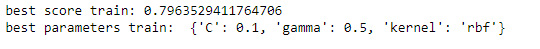

Note

Grid search takes a lot of time to find out the optimum
parameters, and hence, the search parameters given should
be wisely chosen.

From the exercise, we saw how model tuning helps to achieve higher accuracy. Firstly, we implemented data preprocessing, which is the first step to improve the accuracy of the model. Later, we learned how cross-validation and grid search enable us to further tune the machine learning model and improve
the accuracy.